## Plot number of novel verb-particle constructions per decade

In [37]:

def load_vpc_to_year(data_path="vpc_corpus.csv"):
    vpc_to_year = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            first_occurrence = int(line[3])
            vpc_to_year[curr_vpc] = first_occurrence
    return vpc_to_year


def load_vpc_to_frequency(data_path="vpc_corpus.csv"):
    vpc_to_freq = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            frequency = int(line[2])
            vpc_to_freq[curr_vpc] = frequency
    return vpc_to_freq

            
vpc_to_year = load_vpc_to_year()
vpc_to_freq = load_vpc_to_frequency()

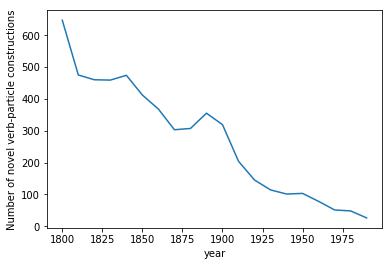

In [17]:


def plot_by_year(vpc_to_year):
    year_counter = Counter(list(vpc_to_year.values()))
    years = list(range(1800, 2000, 10))
    occurrences = [year_counter[year] for year in years]
    plt.plot(years, occurrences)
    
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")


plot_by_year(vpc_to_year)

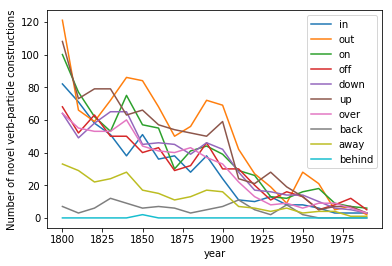

In [3]:
from collections import defaultdict, Counter
import matplotlib.pyplot as plt


def plot_by_particle(vpc_to_year):
    particle_to_year = defaultdict(Counter)
    for (curr_v, curr_p), curr_year in vpc_to_year.items():
        particle_to_year[curr_p].update([curr_year])
        
    years = list(range(1800, 2000, 10))
    for particle, year_counter in particle_to_year.items():
        occurrences = [year_counter[year] for year in years]
        plt.plot(years, occurrences, label=particle)
        
    plt.xlabel("year")
    plt.ylabel("Number of novel verb-particle constructions")
    plt.legend()
    plt.savefig("vpc_counts.png", dpi=500)
            
    
plot_by_particle(vpc_to_year)

## Examine novel verb-particle constructions per decade

In [2]:
import random


def get_vpcs_by_decade(
        vpc_to_year, vpc_to_freq, decade, random_shuffle=False, n_samples=10):
    vpc_freqs = [(vpc, freq) for vpc, freq in vpc_to_freq.items()
                 if vpc_to_year[vpc] == decade]
    if random_shuffle:
        random.shuffle(vpc_freqs)
    else:
        vpc_freqs = sorted(vpc_freqs, key=lambda x: x[1], reverse=True)
    result = [" ".join(item[0]) for item in vpc_freqs]
    return result[:n_samples]


def get_vpcs_by_time_slice(
        vpc_to_year, vpc_to_freq, start_decade, end_decade,
        random_shuffle=False, n_samples=10):
    vpc_freqs = [(vpc, freq) for vpc, freq in vpc_to_freq.items()
                 if vpc_to_year[vpc] >= start_decade and
                 vpc_to_year[vpc] <= end_decade]
    if random_shuffle:
        random.shuffle(vpc_freqs)
    else:
        vpc_freqs = sorted(vpc_freqs, key=lambda x: x[1], reverse=True)
    result = [" ".join(item[0]) for item in vpc_freqs]
    return result[:n_samples]

In [40]:
# Most frequent VPCs per decade

for decade in range(1800, 2000, 10):
    print(decade, ", ".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade)))

1800 back up, sort out, shut down, show off, straighten out, act out, see off, leave over, pin down, straighten up
1810 spell out, line up, heat up, sign up, start over, knock over, climb out, flatten out, wait out, step down
1820 wash up, end up, split up, face up, focus on, level off, loosen up, drift off, mop up, sign on
1830 calm down, cancel out, top off, reach up, smooth out, hand back, ask out, finish up, flare up, tip over
1840 rule out, track down, switch off, catch on, doze off, crop up, win out, climb down, blurt out, crack up
1850 check out, head out, pop up, tighten up, head on, settle out, bog down, rest up, water down, chew up
1860 mess up, join up, black out, touch down, seal off, start down, sober up, dream up, ease up, palm down
1870 contract out, palm up, size up, slow up, nod off, log out, balance out, soften up, chew on, peter out
1880 switch on, trail off, peek out, chill out, link up, bump off, liven up, hunch up, palm out, plug in
1890 piss off, log on, phase ou

In [44]:
# Random frequent VPCs per decade

with open("vpc_corpus_eval_set.csv", "w") as f:
    for decade in range(1800, 2000, 10):
        # print(decade, ", ".join(get_vpcs_by_decade(vpc_to_year, vpc_to_freq, decade, random_shuffle=True)))
        results = get_vpcs_by_decade(
            vpc_to_year, vpc_to_freq, decade, random_shuffle=True, n_samples=20)
        print(decade, results)

        for item in results:
            f.write(f"{decade},{item}\n")



1800 ['coin off', 'hurry away', 'boast on', 'read down', 'produce on', 'crowd off', 'wonder on', 'drift out', 'sleep away', 'trust in', 'remain down', 'assist in', 'punch out', 'stare down', 'stick on', 'slope down', 'convey away', 'rattle down', 'clean over', 'press out']
1810 ['rush off', 'i in', 'extend up', 'infringe on', 'suck up', 'stalk off', 'suffer in', 'hide away', 'maintain on', 'copy off', 'empty away', 'splinter up', 'twist over', 'scald off', 'liveth in', 'assist up', 'dig on', 'bale out', 'ask in', 'see on']
1820 ['clamber down', 'sharpen up', 'hobble off', 'deny down', 'hunt on', 'piss out', 'train in', 'stept out', 'scrape down', 'aye away', 'pick away', 'hurl down', 'stub out', 'frown on', 'dilate on', 'slink out', 'smooth down', 'lose in', 'escort over', 'fish over']
1830 ['trudge off', 'gleam on', 'bowl out', 'continue down', 'dip in', 'mix in', 'hedge in', 'fill down', 'slough out', 'half up', 'find off', 'check in', 'rouse out', 'git on', 'post out', 'summon away'

In [4]:
for start_decade, end_decade in [
        (1800, 1840), (1850, 1890), (1900, 1940), (1950, 1990)]:
    print((start_decade, end_decade), ", ".join(get_vpcs_by_time_slice(
        vpc_to_year, vpc_to_freq, start_decade, end_decade)))

(1800, 1840) calm down, back up, sort out, shut down, show off, straighten out, act out, see off, leave over, rule out
(1850, 1890) check out, switch on, piss off, trail off, mess up, join up, contract out, log on, head out, black out
(1900, 1940) opt out, fuck off, tune out, mull over, hunch over, check over, click off, butt in, screen out, wave over
(1950, 1990) listen up, scroll down, mouth off, power down, fuck over, power off, gross out, fuck out, inhale up, scroll up


## Look at which verbs occur with the most particles

In [3]:
from collections import defaultdict
import get_vpc_corpus
import numpy as np

# Merge any verbs that have the same stem.
VERB_TO_COUNT = defaultdict(int)
for verb, value in get_vpc_corpus.SEED_VERBS.items():
    VERB_TO_COUNT[get_vpc_corpus.get_stem(verb)] += value


def get_verbs_with_most_particles(vpc_to_year):
    verb_to_n_particles = defaultdict(int)
    for verb, particle in vpc_to_year:
        verb_to_n_particles[verb] += 1
    v_prt_count = [
        (verb, prt_count) for verb, prt_count in verb_to_n_particles.items()]
    v_prt_count = sorted(v_prt_count, reverse=True, key=lambda x: x[1])
    return v_prt_count


def load_vpc_to_year(data_path="vpc_corpus.csv", vpc_vocab=None):
    vpc_to_year = {}
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_vpc = (line[0], line[1])
            if vpc_vocab is not None and curr_vpc not in vpc_vocab:
                continue
            first_occurrence = int(line[3])
            vpc_to_year[curr_vpc] = first_occurrence
    return vpc_to_year


def load_particle_to_count(data_path="vpc_corpus.csv"):
    particle_to_count = defaultdict(int)
    with open(data_path, "r") as f: 
        for line in f:
            line = line.split() 
            curr_particle = line[1]
            frequency = int(line[2])
            particle_to_count[curr_particle] += frequency
    return particle_to_count


def normalize_dict(d):
    max_val = np.max(list(d.values()))
    return {k: v / max_val for k, v in d.items()}


PARTICLE_TO_COUNT = normalize_dict(load_particle_to_count())
VERB_TO_COUNT = normalize_dict(VERB_TO_COUNT)
POSSIBLE_VPCS = set([(verb, particle) for verb in VERB_TO_COUNT
                     for particle in PARTICLE_TO_COUNT])
VPC_TO_YEAR = load_vpc_to_year(vpc_vocab=POSSIBLE_VPCS)

v_prt_count = get_verbs_with_most_particles(vpc_to_year)

In [19]:
sum([item[1] for item in v_prt_count])

6926

In [21]:
len(VPC_TO_YEAR)

6926

In [14]:
import random
from collections import Counter, defaultdict

v_prt_count_random = defaultdict(list)

for _ in range(10000):
    curr_sample = random.sample(list(POSSIBLE_VPCS), k=len(VPC_TO_YEAR))
    curr_verbs = get_verbs_with_most_particles(curr_sample)
    curr_counter = Counter([item[1] for item in curr_verbs])
    for k, v in curr_counter.items():
        v_prt_count_random[k].append(v)
    

v_prt_count_random

defaultdict(list,
            {5: [12,
              11,
              11,
              14,
              12,
              19,
              16,
              13,
              9,
              11,
              13,
              15,
              10,
              17,
              13,
              9,
              10,
              11,
              9,
              15,
              7,
              13,
              16,
              8,
              13,
              9,
              12,
              14,
              11,
              12,
              12,
              9,
              18,
              10,
              15,
              15,
              9,
              16,
              17,
              10,
              13,
              17,
              16,
              12,
              10,
              13,
              13,
              11,
              7,
              8,
              10,
              14,
              18,
              6,
              12,


In [29]:
len(curr_verbs)

4441

In [25]:
curr_counter

Counter({6: 2, 5: 12, 4: 79, 3: 421, 2: 1348, 1: 2579})

In [31]:
sum([k * v for k, v in curr_counter.items()])

6926

In [32]:
sum([k * v for k, v in v_prt_count_random.items()])

6952.841017267625

In [36]:
sum([k * v for k, v in prt_counter.items()])

6926

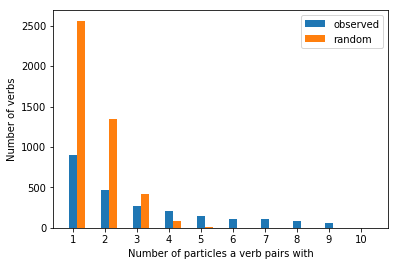

In [16]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import numpy as np

fig, ax = plt.subplots()

prt_counter = Counter([item[1] for item in v_prt_count])
v_prt_count_random = {k: np.mean(v) for k, v in v_prt_count_random.items()}

counts = np.array(list(range(1, 11)))

width = 0.25
plt.bar(counts, [prt_counter.get(k, 0) for k in counts],
        width, label="observed")
plt.bar(counts + width, [v_prt_count_random.get(k, 0) for k in counts],
       width, label="random")

plt.xlabel("Number of particles a verb pairs with")
plt.ylabel("Number of verbs")
plt.xticks(list(range(1, 11)))
plt.legend()
plt.savefig("particle_counts.png", dpi=500)
plt.show()

In [63]:
plt.xticks?

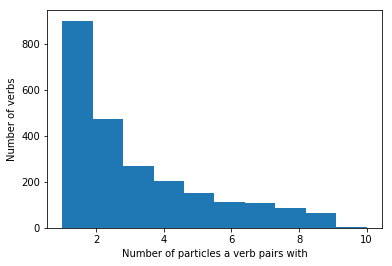

In [12]:
import matplotlib.pyplot as plt

plt.hist([item[1] for item in v_prt_count])
plt.xlabel("Number of particles a verb pairs with")
plt.ylabel("Number of verbs")
plt.show()

In [6]:
print(v_prt_count)

[('leave', 10), ('lie', 10), ('beat', 9), ('break', 9), ('bring', 9), ('call', 9), ('carry', 9), ('cast', 9), ('come', 9), ('cut', 9), ('do', 9), ('drag', 9), ('draw', 9), ('drive', 9), ('drop', 9), ('fall', 9), ('fight', 9), ('force', 9), ('find', 9), ('git', 9), ('give', 9), ('get', 9), ('have', 9), ('hold', 9), ('keep', 9), ('kick', 9), ('knock', 9), ('lay', 9), ('lead', 9), ('look', 9), ('make', 9), ('move', 9), ('pass', 9), ('pay', 9), ('play', 9), ('pull', 9), ('push', 9), ('put', 9), ('read', 9), ('roll', 9), ('send', 9), ('set', 9), ('ship', 9), ('shove', 9), ('show', 9), ('sell', 9), ('slip', 9), ('spring', 9), ('stagger', 9), ('stay', 9), ('start', 9), ('stand', 9), ('steal', 9), ('strike', 9), ('swim', 9), ('swing', 9), ('talk', 9), ('throw', 9), ('take', 9), ('tell', 9), ('turn', 9), ('go', 9), ('wave', 9), ('be', 9), ('work', 9), ('write', 9), ('ask', 8), ('blow', 8), ('bear', 8), ('bind', 8), ('boil', 8), ('brush', 8), ('burn', 8), ('change', 8), ('conduct', 8), ('crawl',